In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import *
%matplotlib inline

df = pd.read_excel('Analyst_Data.xls', sheetname=5)
print(df)

      Период  Канал A  Канал B  Канал C  Канал D
0       июль      220      300      400    100.0
1       июнь      180      320      380    110.0
2     август      200      310      400     90.0
3   сентябрь      270      330      390      NaN
4    октябрь      250      330      420      NaN
5     ноябрь      270      360      400      NaN
6    декабрь      240      360      380      NaN
7     январь      270      370      420      NaN
8    февраль      260      370      420      NaN
9       март      230      360      390      NaN
10    апрель      230      370      390      NaN
11       май      260      350      400      NaN


In [2]:
df = df.rename(columns={'Период': 'period', 'Канал A': 'A', 'Канал B': 'B', 'Канал C': 'C', 'Канал D': 'D'})
pd.to_numeric(df['A'])
pd.to_numeric(df['B'])
pd.to_numeric(df['C'])
pd.to_numeric(df['D'])
df

,period,A,B,C,D
0,июль,220,300,400,100.0
1,июнь,180,320,380,110.0
2,август,200,310,400,90.0
3,сентябрь,270,330,390,NaN
4,октябрь,250,330,420,NaN
5,ноябрь,270,360,400,NaN
6,декабрь,240,360,380,NaN
7,январь,270,370,420,NaN
8,февраль,260,370,420,NaN
9,март,230,360,390,NaN


In [3]:
## реордер месяца по порядку
df = df.reindex([1,0,2,3,4,5,6,7,8,9,10,11]).reset_index(drop=True)
df

,period,A,B,C,D
0,июнь,180,320,380,110.0
1,июль,220,300,400,100.0
2,август,200,310,400,90.0
3,сентябрь,270,330,390,NaN
4,октябрь,250,330,420,NaN
5,ноябрь,270,360,400,NaN
6,декабрь,240,360,380,NaN
7,январь,270,370,420,NaN
8,февраль,260,370,420,NaN
9,март,230,360,390,NaN


In [4]:
report =  pd.DataFrame(data=None, index=["Среднее количество регистраций в мес", "Отклонение от среднего значения"], columns=["A", "B", "C", "D", "Average"])

In [5]:
report

,A,B,C,D,Average
Среднее количество регистраций в мес,NaN,NaN,NaN,NaN,NaN
Отклонение от среднего значения,NaN,NaN,NaN,NaN,NaN


In [6]:
report['A'] = [df['A'].mean(), np.std(df['A'])]
report['B'] = [df['B'].mean(), np.std(df['B'])]
report['C'] = [df['C'].mean(), np.std(df['C'])]
report['D'] = [df['D'].mean(), np.std(df['D'])]
report['Average'] = [report.loc['Среднее количество регистраций в мес'].mean(), report.loc['Отклонение от среднего значения'].mean()]

In [7]:
report = report.applymap(lambda x: float('%.f' % x))
report

,A,B,C,D,Average
Среднее количество регистраций в мес,240.0,344.0,399.0,100.0,271.0
Отклонение от среднего значения,28.0,24.0,14.0,8.0,18.0


In [8]:
## считаем показатели за три месяца по четырем каналам
df_aug = df.loc[0:2]
df_aug
report_aug =  pd.DataFrame(data=None, index=["Среднее количество регистраций в мес", "Отклонение от среднего значения"], columns=["A", "B", "C", "D", "Average"])
report_aug['A'] = [df_aug['A'].mean(), np.std(df_aug['A'])]
report_aug['B'] = [df_aug['B'].mean(), np.std(df_aug['B'])]
report_aug['C'] = [df_aug['C'].mean(), np.std(df_aug['C'])]
report_aug['D'] = [df_aug['D'].mean(), np.std(df_aug['D'])]
report_aug['Average'] = [report_aug.loc['Среднее количество регистраций в мес'].mean(), report_aug.loc['Отклонение от среднего значения'].mean()]
report_aug = report_aug.applymap(lambda x: float('%.f' % x))
report_aug

,A,B,C,D,Average
Среднее количество регистраций в мес,200.0,310.0,393.0,100.0,251.0
Отклонение от среднего значения,16.0,8.0,9.0,8.0,11.0


In [9]:
## считаем показатели за 9 месяце по трем каналам
df_nine = df.loc[3:12]
df_nine
report_nine =  pd.DataFrame(data=None, index=["Среднее количество регистраций в мес", "Отклонение от среднего значения"], columns=["A", "B", "C", "D", "Average"])
report_nine['A'] = [df_nine['A'].mean(), np.std(df_nine['A'])]
report_nine['B'] = [df_nine['B'].mean(), np.std(df_nine['B'])]
report_nine['C'] = [df_nine['C'].mean(), np.std(df_nine['C'])]
report_nine['D'] = [df_nine['D'].mean(), np.std(df_nine['D'])]
report_nine['Average'] = [report_nine.loc['Среднее количество регистраций в мес'].mean(), report_nine.loc['Отклонение от среднего значения'].mean()]
report_nine = report_nine.applymap(lambda x: float('%.f' % x))
report_nine


,A,B,C,D,Average
Среднее количество регистраций в мес,253.0,356.0,401.0,NaN,337.0
Отклонение от среднего значения,16.0,15.0,14.0,NaN,15.0


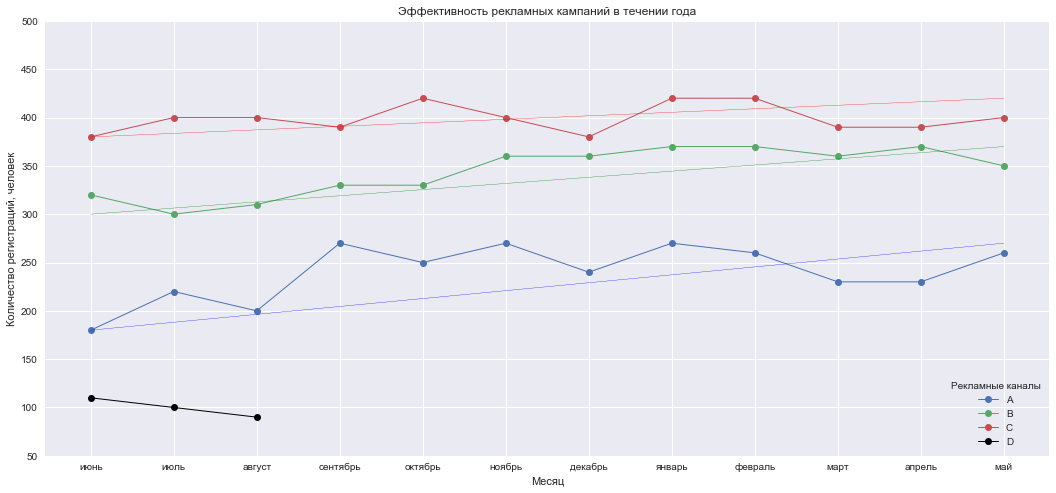

In [10]:
## строим график каналов
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
plt.xticks(range(len(df['period'])), df['period'])
ax.plot(list(range(len(df['A']))), df['A'], label='A', linewidth=1, marker='o')
lm1 = smf.ols("A ~ A", data=df).fit()
xmin = df.A.min()
xmax = df.A.max()
X1 = np.linspace(xmin, xmax, 12)
# params[0] is the intercept (beta0) # params[1] is the slope (beta1)
Y1 = lm1.params[0] + lm1.params[1] * X1
plt.plot(list(range(len(df['A']))), Y1, color="blue", linewidth=.3)


ax.plot(list(range(len(df['B']))), df['B'], label='B', linewidth=1, marker='o')
lm2 = smf.ols("B ~ B", data=df).fit()
xmin2 = df.B.min()
xmax2 = df.B.max()
X2 = np.linspace(xmin2, xmax2, 12)
# params[0] is the intercept (beta0) # params[1] is the slope (beta1)
Y2 = lm2.params[0] + lm2.params[1] * X2
plt.plot(list(range(len(df['B']))), Y2, color="green", linewidth=.3)


ax.plot(list(range(len(df['C']))), df['C'], label='C', linewidth=1, marker='o')
lm3 = smf.ols("C ~ C", data=df).fit()
xmin3 = df.C.min()
xmax3 = df.C.max()
X3 = np.linspace(xmin3, xmax3, 12)
# params[0] is the intercept (beta0) # params[1] is the slope (beta1)
Y3 = lm3.params[0] + lm3.params[1] * X3
plt.plot(list(range(len(df['C']))), Y3, color="red", linewidth=.3)


ax.plot(list(range(len(df['D']))), df['D'], label='D', linewidth=1, color='black', marker='o')


plt.yticks(range(50, 550, 50))


ax.legend(loc=4, title='Рекламные каналы')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество регистраций, человек')
ax.set_title("Эффективность рекламных кампаний в течении года")

In [11]:
df['Average'] = (df['A'] + df['B'] + df['C']) / 3
df

,period,A,B,C,D,Average
0,июнь,180,320,380,110.0,293.333333
1,июль,220,300,400,100.0,306.666667
2,август,200,310,400,90.0,303.333333
3,сентябрь,270,330,390,NaN,330.000000
4,октябрь,250,330,420,NaN,333.333333
5,ноябрь,270,360,400,NaN,343.333333
6,декабрь,240,360,380,NaN,326.666667
7,январь,270,370,420,NaN,353.333333
8,февраль,260,370,420,NaN,350.000000
9,март,230,360,390,NaN,326.666667


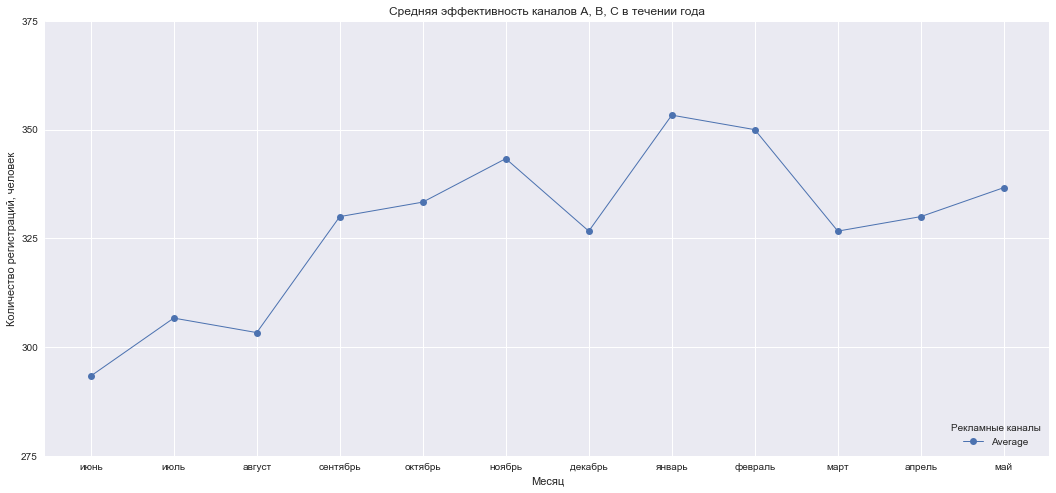

In [12]:
## строим график каналов A B C 
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
plt.xticks(range(len(df['period'])), df['period'])
ax.plot(list(range(len(df['Average']))), df['Average'], linewidth=1, marker='o')
plt.yticks(range(275, 400, 25))


ax.legend(loc=4, title='Рекламные каналы')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество регистраций, человек')
ax.set_title("Средняя эффективность каналов A, B, C в течении года")

In [13]:
ls = ['A', 'B', 'C', 'D']
correlation =  pd.DataFrame(data=None, index=['A', 'B', 'C', 'D'], columns=['A', 'B', 'C', 'D'])

for i, x in enumerate(ls):
    for j, y in enumerate(ls):            
        if x != y:
            r, p = pearsonr(df[x], df[y])
            print("beetween {0} and {1} corr is {2}, p-value is {3}".format(x, y, r, p))


beetween A and B corr is 0.5715204477691241, p-value is 0.0522237520990217
beetween A and C corr is 0.49555080427051346, p-value is 0.10136023161024633
beetween A and D corr is nan, p-value is 1.0
beetween B and A corr is 0.5715204477691241, p-value is 0.0522237520990217
beetween B and C corr is 0.16146248174384875, p-value is 0.6161427800898922
beetween B and D corr is nan, p-value is 1.0
beetween C and A corr is 0.49555080427051346, p-value is 0.10136023161024633
beetween C and B corr is 0.16146248174384875, p-value is 0.6161427800898922
beetween C and D corr is nan, p-value is 1.0
beetween D and A corr is nan, p-value is 1.0
beetween D and B corr is nan, p-value is 1.0
beetween D and C corr is nan, p-value is 1.0


In [14]:
df

,period,A,B,C,D,Average
0,июнь,180,320,380,110.0,293.333333
1,июль,220,300,400,100.0,306.666667
2,август,200,310,400,90.0,303.333333
3,сентябрь,270,330,390,NaN,330.000000
4,октябрь,250,330,420,NaN,333.333333
5,ноябрь,270,360,400,NaN,343.333333
6,декабрь,240,360,380,NaN,326.666667
7,январь,270,370,420,NaN,353.333333
8,февраль,260,370,420,NaN,350.000000
9,март,230,360,390,NaN,326.666667


308.675213675
3.47319347319
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[ 312.14840715  315.62160062  319.09479409  322.56798757  326.04118104
  329.51437451  332.98756799  336.46076146  339.93395493  343.40714841
  346.88034188  350.35353535]
138.0


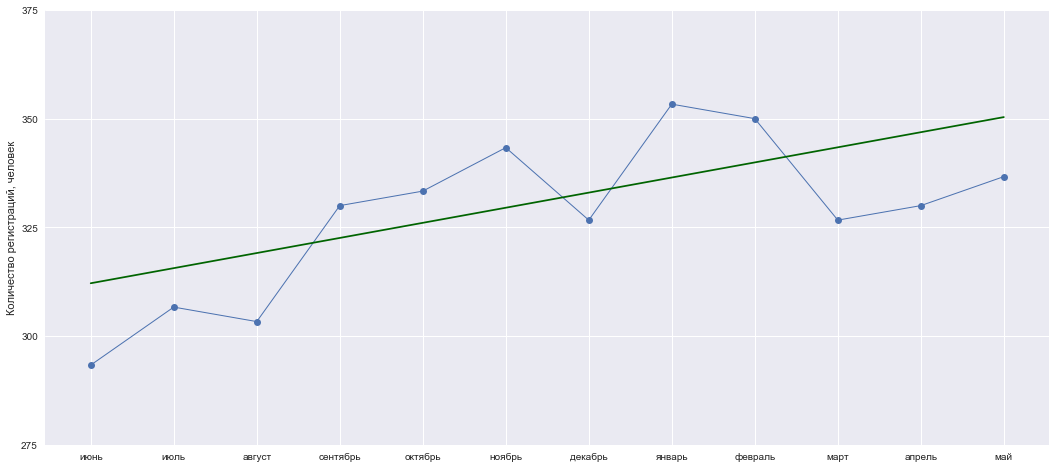

In [109]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(list(range(len(df['Average']))), df['Average'], linewidth=1,  marker='o')
plt.xticks(range(len(df['period'])), df['period'])
lm = smf.ols("Average ~ range(len(df['period']))", data=df).fit()

X = range(1, 13)
# params[0] is the intercept (beta0) # params[1] is the slope (beta1)
Y = lm.params[0] + lm.params[1] * X
plt.plot(list(range(len(df['Average']))), Y, color="darkgreen")

plt.yticks(range(275, 400, 25))
print(lm.params[0])
print(lm.params[1])
print(list(X))
print(Y)
print(round(100 + lm.params[1] * 11))
ax.set_ylabel('Количество регистраций, человек')

In [21]:
lm.summary()

/Users/greg.fetisov/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Average   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     8.558
Date:                Tue, 05 Sep 2017   Prob (F-statistic):             0.0152
Time:                        17:23:21   Log-Likelihood:                -47.770
No. Observations:                  12   AIC:                             99.54
Df Residuals:                      10   BIC:                             100.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  308.6752      7.710     40.038      0.000     291.497     325.853
range(len(df['period']))     3.4732      1.187      2.925      0.015       0.828       6.119
==============================================================================
Omnibus:                        5.236   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                1.424
Skew:                           0.274   Prob(JB):                        0.491
Kurtosis:                       1.404   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

308.675213675
3.47319347319
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[ 312.14840715  315.62160062  319.09479409  322.56798757  326.04118104
  329.51437451  332.98756799  336.46076146  339.93395493  343.40714841
  346.88034188  350.35353535]
138.0


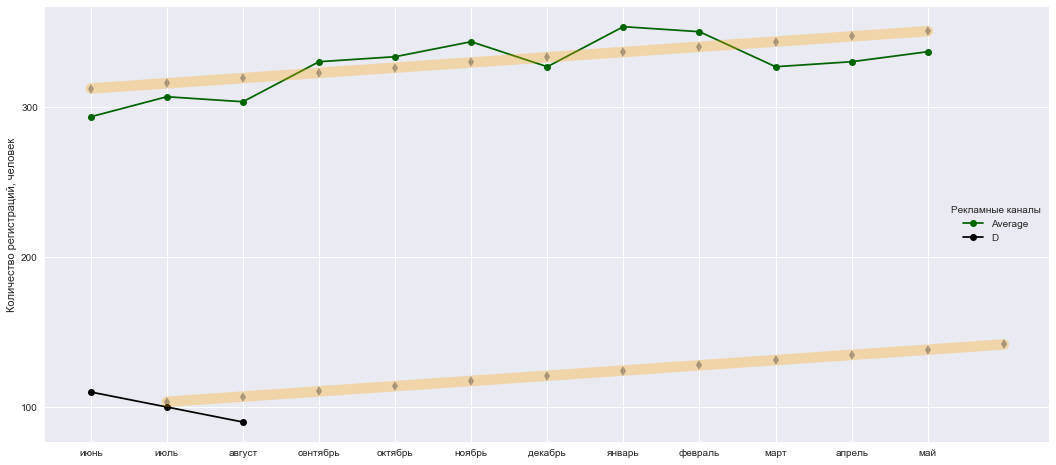

In [113]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
plt.xticks(range(len(df['period'])), df['period'])
plt.yticks(range(100, 600, 100))

ax.plot(list(range(len(df['Average']))), df['Average'], color='darkgreen', marker='o')
slope = range(len(df['period']))
lm = smf.ols("Average ~ slope", data=df).fit()
X = range(1, 13)
# params[0] is the intercept (beta0) # params[1] is the slope (beta1)
Y = lm.params[0] + lm.params[1] * X
plt.plot(list(range(len(df['Average']))), Y, color='orange', linewidth=10.5, alpha=0.3, marker='d', MarkerEdgeColor='black', MarkerFaceColor='black')

ax.plot(list(range(len(df['D']))), df['D'], color='black', marker='o')
lm1 = smf.ols("Average ~ slope", data=df).fit()
Xd = range(1, 13)
# params[0] is the intercept (beta0) # params[1] is the slope (beta1)
Yd = 100 + lm1.params[1] * Xd
plt.plot(list(range(1, 13)), Yd, color='orange', linewidth=10.5, alpha=0.3, marker='d', MarkerEdgeColor='black', MarkerFaceColor='black')



print(lm.params[0])
print(lm.params[1])
print(list(X))
print(Y)
print(round(100 + lm.params[1] * 11))
ax.legend(loc=5, title='Рекламные каналы')


ax.set_ylabel('Количество регистраций, человек')

In [114]:
lm1.summary()

/Users/greg.fetisov/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Average   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     8.558
Date:                Tue, 05 Sep 2017   Prob (F-statistic):             0.0152
Time:                        20:42:51   Log-Likelihood:                -47.770
No. Observations:                  12   AIC:                             99.54
Df Residuals:                      10   BIC:                             100.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    308.6752      7.710     40.038      0.000     291.497     325.853
slope          3.4732      1.187      2.925      0.015       0.828       6.119
==============================================================================
Omnibus:                        5.236   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                1.424
Skew:                           0.274   Prob(JB):                        0.491
Kurtosis:                       1.404   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
## найдем доверительные интервалы для slope (b1)
lm.conf_int(.1)

,0,1
Intercept,294.701863,322.648564
slope,1.321324,5.625063


In [136]:
low = 100 + 1.321324 * 11
low

114.534564

In [137]:
upper = 100 + 5.625063 * 11
upper

161.875693